### Descriptive statistics and statistical inference 2


 #### Neural circuit basis of visuo-spatial working memory precision: a computational and behavioral study 
   According to the model, nearby locations should be recalled with a bias, as if the two memory traces showed attraction or repulsion during the delay period depending on distance. Another prediction is that the previously reported loss of memory precision for an increasing number of memory items (memory load) should vanish when the distances between items are controlled for.
   
   #### Import Data & Libraries

In [163]:
from numpy import *
import numpy as np
import matplotlib 
from matplotlib.mlab import *
from matplotlib.pylab import *
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy import stats
from scipy.stats import circmean,circvar,circstd
from cmath import phase
from  numpy import array

% matplotlib inline


f = open("all_subjs.mat", "rb")
all_subjs = loadmat(f)["all_subjs"]
all_subjs = [subj[0] for subj in all_subjs]    



def len2(x):
    if type(x) is not type([]):
        if type(x) is not type(array([])):
            return -1
    return len(x)

def phase2(x):
    if not isnan(x):
        return phase(x)
    return nan

def circdist(angles1,angles2):
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
    if len2(angles1) < 0:
        angles1 = [angles1]*len(angles2)
    return amap(lambda a1,a2: phase2(exp(1j*a1)/exp(1j*a2)), angles1,angles2)

#### Inspect Data 

In [164]:
# all_subj[n] : n gives the subjects that I inspected. 
# First one is behavioural response (radians, -pi to +pi) and other three are the presented stimuli. (Total 4 columns)

print shape(all_subjs)
firstsubject = all_subjs[1]
print shape(firstsubject)

print("Report of the 6th subject in 4th trial: ", all_subjs[5][3,0])

print("Target stimulus of the 7th subject in 15th trial: ", all_subjs[6][14,1])

print("Close non-target stimulus of the 3th subject in 8th trial: ", all_subjs[2][7,2])

print("Far non-target stimulus of the 2th subject in 13th trial: ", all_subjs[1][12,3])





(9L,)
(45L, 4L)
('Report of the 6th subject in 4th trial: ', 2.7751608428854504)
('Target stimulus of the 7th subject in 15th trial: ', 2.7948853832270855)
('Close non-target stimulus of the 3th subject in 8th trial: ', 0.4008761525381771)
('Far non-target stimulus of the 2th subject in 13th trial: ', -2.039468691330966)


## Exercises

### 1) Use the knowledge you have about the stimulus configuration and hist function to find out which of the 3 stimuli (which column) is the target. 

(-6.283185307179586, 6.283185307179586)

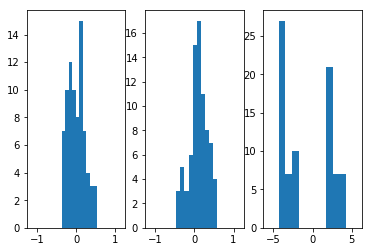

In [165]:

diff = all_subjs[0][:,0] - all_subjs[0][:,1] # # To compute the distance of the subjects’ report to each of the stimuli

plt.subplot(1,3,1)
plt.hist(all_subjs[0][:,1] - all_subjs[0][:,0])
plt.xlim(-np.pi/2.5,np.pi/2.5)

plt.subplot(1,3,2)
plt.hist(all_subjs[0][:,2] - all_subjs[0][:,0])
plt.xlim(-np.pi/2.5,np.pi/2.5)

plt.subplot(1,3,3)
plt.hist(all_subjs[0][:,3] - all_subjs[0][:,0])
plt.xlim(-np.pi*2,np.pi*2)



### 2) Use circ_var to calculate the precision of each subject around the target stimulus (a measure of precision can be the inverse of the variance of responses around the target). Which subject had the best and which the worst precision? 


In [166]:
dvar=[] #  Computes circular variance for circular data 
for i in range(0,9):
    v2=circvar(all_subjs[i][:,1]-all_subjs[i][:,0])
    v3=circvar(all_subjs[i][:,2]-all_subjs[i][:,0])
    v4=v3-v2
    dvar.append(v4)
    
print (dvar)

# Subject 1 is the best precision because it has lowest value.
# Subject 5 is the worst precision because it has highest value. 

[0.009050233613174016, 0.0461472490837042, 0.045430737221308304, 0.05474037689251655, 0.10141175593565899, 0.09429501370159887, 0.0736137116018761, 0.0943092809387535, 0.08597879832646796]


### 3) For each subject, plot the histogram of report errors (i.e. distance of report angle to target angle). Since we have 9 subjects you can plot all histograms in one graph using the command subplot(3,3,X), where X will run from 1 to 9 for each of your subjects. Remember that because we are dealing with angles, we need to take care of circular symmetries and we therefore compute distances with circ_dist, rather than a simple subtraction.

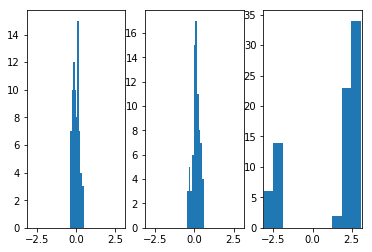

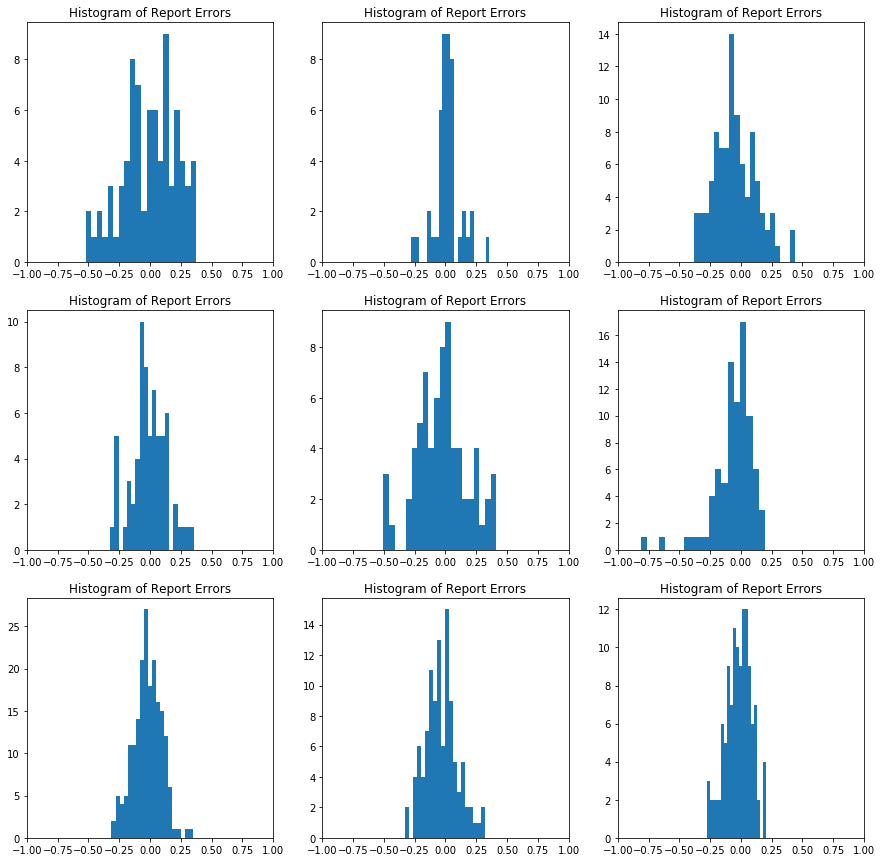

In [167]:
#circdist ( function r =  circ_dist(x,y) )
#r = circ_dist(alpha, beta)  Pairwise difference x_i-y_i around the circle computed efficiently.
#we are dealing with angles, we need to take care of circular symmetries and we therefore compute distances

err=[]
for i in range(0,9):
    error=circdist(all_subjs[i][:,1],all_subjs[i][:,0])
    err.append(error)

plt.subplot(1,3,1)
plt.hist(circdist(all_subjs[0][:,1],all_subjs[0][:,0]))
plt.xlim(-np.pi,np.pi)

plt.subplot(1,3,2)
plt.hist(circdist(all_subjs[0][:,2],all_subjs[0][:,0]))
plt.xlim(-np.pi,np.pi)

plt.subplot(1,3,3)
plt.hist(circdist(all_subjs[0][:,3],all_subjs[0][:,0]))
plt.xlim(-np.pi,np.pi)

plt.show()

dist_nt=[]
err=[]
for i in range(0,9):
    dist_nt.append(circdist(all_subjs[i][:,2],all_subjs[i][:,1]))
    err.append(circdist(all_subjs[i][:,0],all_subjs[i][:,1]))
    
plt.figure(figsize=(15,15))

for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.hist(err[i],bins=20)
    plt.xlim(-1,1)
    plt.title('Histogram of Report Errors')
plt.show()

    

# print ("Distance of report angle to target angle :" + str (dist_nt) )
# print ("Report errors: " + str(err))

### 4)Now, do the same thing but for each subject you will separate in different histograms whether the nearest non-target item (3rd column) was clockwise or counter-clockwise from the target (2nd column). In order to plot the two histograms on the same axes with different color, remember that we learned to use:

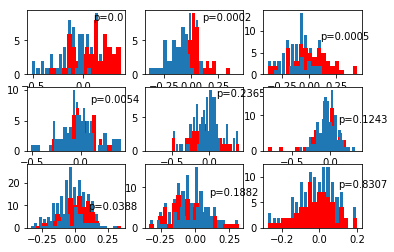

In [213]:
for i in range(0,9):
    inCW=np.where(dist_nt[i]<0) # clockwise
    inCCW=np.where(dist_nt[i]>0) #counter clockwise
    

    hist, bins = np.histogram(err[i], bins=20)
    H=plt.hist(err[i][inCW],bins)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(3,3,i+1)
    plt.bar(center, hist, align='center', width=width)
    H=plt.hist(err[i][inCCW],bins=bins, color='r')
    width = 0.7 * (bins[1] - bins[0])
    alpha=.5
    [h,pval]=stats.ttest_ind(err[i][inCW], err[i][inCCW])
    text(.1,8,'p=' + str(round(pval,4)))

 
plt.figure(figsize=(20,20))    
plt.show()

### 5) We want to test if there are significant differences in report biases between clockwise and counter-clockwise trials. We can test this independently for each subject with a 2-sample t-test using the command ttest2. What subjects had an effect? Was it attractive or repulsive?

In [169]:
# Subjects 1, 2, 3, 4 and 7 are attractive while subjects 5, 8 and 9 are repulsive. (as you can see in above)


### 6) The above test made the assumption that our distributions of errors were Gaussian. We can test that assumption by plotting the error distributions with the function qqplot for each subject (again, use the subplot command). Strong deviations from a straight line are considered a violation of the Gaussian assumption. Are there concerns in this dataset about the parametric approach?


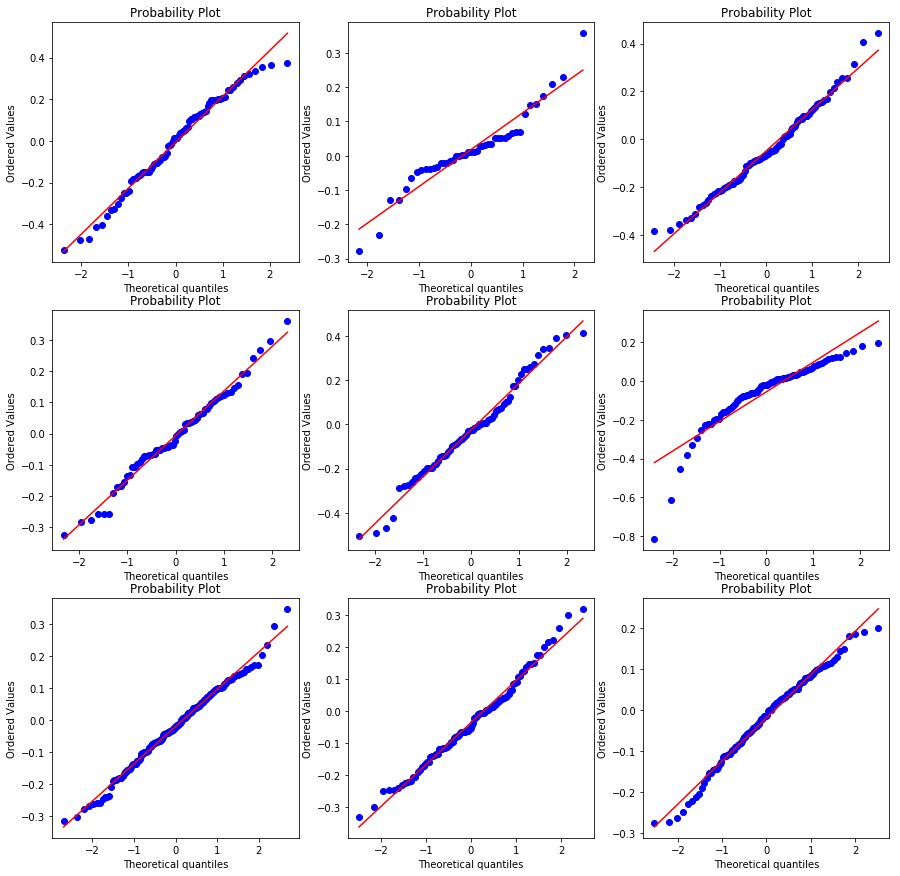

In [170]:
import pylab 
import scipy.stats as stats


plt.figure(figsize=(15,15))
for i in range(0,9):
    subplot(3,3,i+1)
    stats.probplot(err[i], dist="norm", plot=pylab) #Quantile-Quantile Plot

plt.show()

#It doesn't seem like they have strong deviations from a straight line

### 7) We can instead avoid the Gaussian hypothesis by using permutation tests. Here, for each subject you would establish how many trials you had in the CW and CCW classes, and randomly assign individual trial errors to one of the two classes by keeping the total number in each class fixed. 
### This resampled distribution of trials in two classes then represents one valid representative sample consistent with your null hypothesis (which is your null hypothesis, by the way?). You compute the distance between medians in your resampled classes, and save that statistic. 
### Then you resample again and repeat the process 1,000 times. Finally you compare the actual statistic from your real CW-CCW class separation to the distribution of statistics in samples that are consistent with your null hypothesis and from there derive a p-value for the probability of your null hypothesis being true. Do you get similar results to section c) above?


0.27160108163372026
(1000L,)


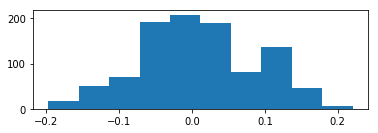

0.09151305175480284
(1000L,)


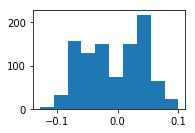

(1L, 68L)
(1L, 52L)


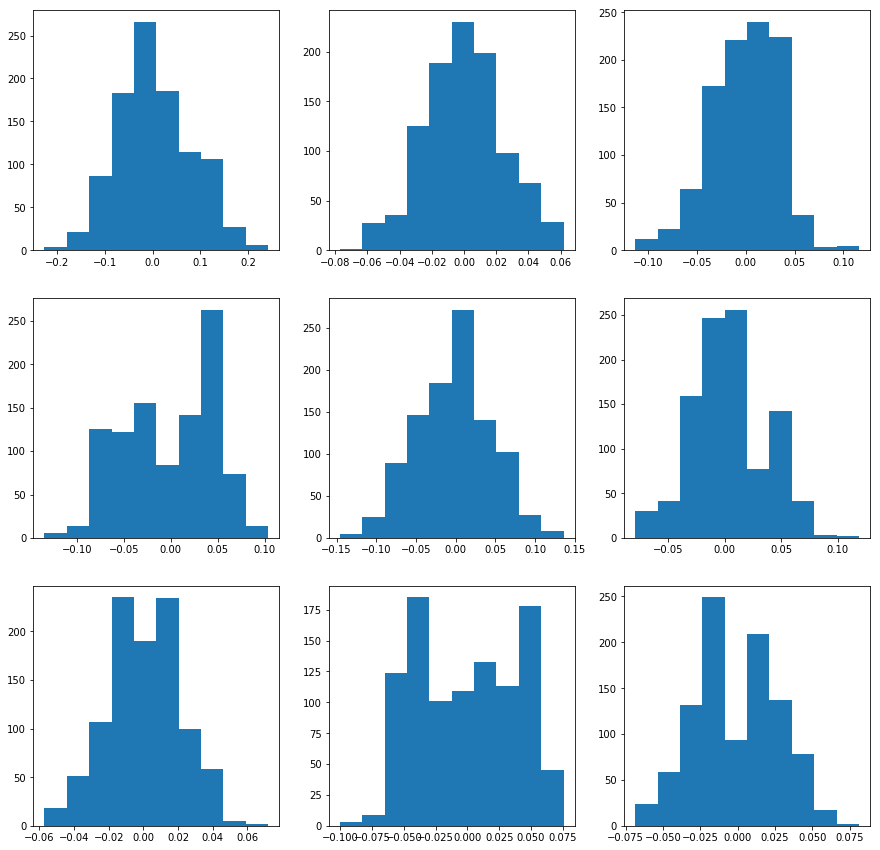

0.734
734


In [195]:
i=0
inCCW=np.where(dist_nt[i]>0)
inCW=np.where(dist_nt[i]<0)
statistic=np.median(err[i][inCCW])-np.median(err[i][inCW])
print statistic

nCCW=len(inCCW[0])
nCW=len(inCW[0])

stat_permtest=[]
for i in range(0,1000):
    ins=np.random.permutation(nCCW+nCW)
    in1=ins[0:nCCW]
    in2=ins[nCCW+1:]
    permtest=np.median(err[0][in1])-np.median(err[0][in2])
    stat_permtest.append(permtest)

print np.shape(stat_permtest)
plt.subplot (2,1,2)
plt.hist(stat_permtest)
plt.show()

i=3
inCCW=np.where(dist_nt[i]>0)
inCW=np.where(dist_nt[i]<0)
statistic=np.median(err[i][inCCW])-np.median(err[i][inCW])
print statistic

nCCW=len(inCCW[0])
nCW=len(inCW[0])

stat_permtest=[]
for i in range(0,1000):
    ins=np.random.permutation(nCCW+nCW)
    in1=ins[0:nCCW]
    in2=ins[nCCW+1:]
    permtest=np.median(err[3][in1])-np.median(err[3][in2])
    stat_permtest.append(permtest)

print np.shape(stat_permtest)
plt.subplot(2,2,2)
plt.hist(stat_permtest)
plt.show()

#The null hypothesis: There is no significant difference between CW and CCW. 


plt.figure(figsize=(15,15))
for i in range(0,9):
    inCCW=np.where(dist_nt[i]>0)
    inCW=np.where(dist_nt[i]<0)
    statistic=np.median(err[i][inCCW])-np.median(err[i][inCW])
    nCCW=len(inCCW[0])
    nCW=len(inCW[0])
    stat_permtest=[]
    for x in range(0,1000):
        ins=np.random.permutation(nCCW+nCW)
        in1=ins[0:nCCW]
        in2=ins[nCCW+1:]
        permtest=np.median(err[i][in1])-np.median(err[i][in2])
        stat_permtest.append(permtest)
    plt.subplot(3,3,i+1)
    plt.hist(stat_permtest)    

print shape(inCCW)
print shape(inCW)
plt.show()    

print np.mean(stat_permtest>statistic)
length=len(find(stat_permtest>statistic))
print length

### 8) Similar results could have been obtained by computing the 95% confidence intervals of the medians of each distribution (CW and CCW) for each subject. Although statistical tests and p-values are very prevalent in scientific literature, confidence intervals have the advantage of providing additional information, such as the magnitude of the difference or the confidence in our data. To see this, go subject by subject (for loop) and compute now the medians and confidence intervals of the median for each set of trials, CW and CCW. To compute confidence intervals, get the 2.5 and 97.5 percentiles from the medians of 1,000 bootstrap samples (remember, resampling with replacement). You can do this either manually or with the command bootstrp of Matlab. You can plot the two medians (CW and CCW) and their CI on the same graph with the command errorbar

%95 confidence for inCW low: -0.041903838967892064 high :0.040032868877277236
%95 confidence for inCCW low: -0.041903838967892064 high :0.04078853580822678
Clockwise : [-0.16468403472007032, -0.03752498497052372, -0.11082105889861918, -0.05892378015107959, -0.010853565421146419, 0.012341871656591463, -0.0407401366280516, -0.00504204893930967, 0.0021522729607912827]
Counterclockwise : [0.10691704691364995, 0.03389706189316646, -0.0007286771279233302, 0.032589271603723255, -0.06595915261480288, -0.03984982326682769, 0.010484820634151635, -0.0646982729175156, -0.017063711287680503]


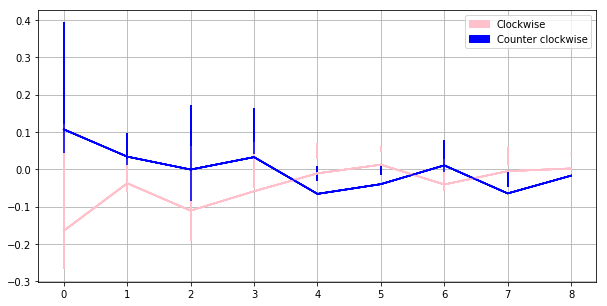

In [210]:
import numpy.random as npr
import matplotlib.patches as mpatches    

def bootstrap(data, num_samples, statistic, alpha): # function is taken from https://gist.github.com/atmb4u/6a4e5c0a032486a9b50f
    # """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
        stat[int((1-alpha/2.0)*num_samples)])

inCW_low=[]
inCW_high = []
inCCW_low =[]
inCCW_high =[]

for i in range(0,9):
    inCCW=np.where(dist_nt[i]>0)
    inCW=np.where(dist_nt[i]<0)
    b1 = err[i][inCW]
    lowCW, highCW = bootstrap(b1, 1000, np.median, 0.05)
    inCW_low.append(lowCW)
    inCW_high.append(highCW)
    b2 = err[i][inCCW]
    lowCCW, highCCW = bootstrap(b1, 1000, np.median, 0.05)
    inCCW_low.append(lowCCW)
    inCCW_high.append(highCCW)
    
#Bootstrap
print ("%95 confidence for inCW " + "low: " + str(lowCW) + " high :" + str(highCW) )
print ("%95 confidence for inCCW " + "low: " + str(lowCCW) + " high :" + str(highCCW) )

med_tot_inCW = []
med_tot_inCCW = []
for i in range(0,9):
    inCCW=np.where(dist_nt[i]>0)
    inCW=np.where(dist_nt[i]<0)
    med_set_inCW=median(err[i][inCW])
    med_tot_inCW.append(med_set_inCW)
    med_set_inCCW=median(err[i][inCCW])
    med_tot_inCCW.append(med_set_inCCW)
    
print ("Clockwise : " + str(med_tot_inCW) )
print ("Counterclockwise : " +str (med_tot_inCCW))

# Bootstrap as error bars

plt.figure(figsize=(10,5))
for i in range(0,9):
    yerr_inCW=[inCW_low ,inCW_high]
    yerr_inCCW=[inCCW_low,inCCW_high]
    plt.errorbar(np.arange(0,9,1),med_tot_inCW,xerr=None,yerr=yerr_inCW,color='pink')
    plt.errorbar(np.arange(0,9,1),med_tot_inCCW,xerr=None,yerr=yerr_inCCW,color='blue')

    pink= mpatches.Patch(color='pink', label='Clockwise')
    blue= mpatches.Patch(color='blue', label='Counter clockwise')
    plt.legend(handles=[pink, blue])
    plt.grid()
    
    



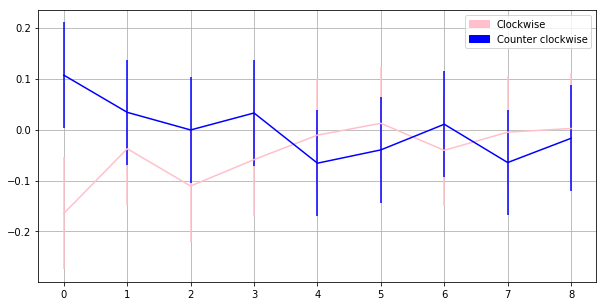

In [211]:
# Standart Deviation as error bars

inCW_std = np.std(med_tot_inCW)
inCCW_std = np.std(med_tot_inCCW)

plt.figure(figsize=(10,5))

plt.errorbar(np.arange(0,9,1),med_tot_inCW,xerr=None,yerr=2*inCW_std,color='pink')
plt.errorbar(np.arange(0,9,1),med_tot_inCCW,xerr=None,yerr=2*inCCW_std,color='blue')

pink= mpatches.Patch(color='pink', label='Clockwise')
blue= mpatches.Patch(color='blue', label='Counter clockwise')
plt.legend(handles=[pink, blue])
plt.grid()
plt.show()
